### Deep Learning Notes 4
- *Автор*: Зитцер Данил
- *Дата*: понедельник, 15 февраля 2021 г., 09:50:45
- *Описание*: Изучив устройство градиентного спуска и предназначение функций активации переходим к применению полносвязных нейронных сетей для решения разного рода задач.
- *План блокнота*:
    1. Классификация отзывов к фильмам (задача бинарной классификации)
    2. Предсказание цен на дома (задача регрессии)
    3. Классификация предметов одежды набора данных Fashion MNIST (задача многоклассовой классификации)
- *Полезные ссылки*:
    - [Keras Datasets](https://keras.io/api/datasets/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets

from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras import models
from tensorflow.keras import optimizers


plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['font.size'] = 20

### Бинарная классификация отзывов к фильмам

[Примеры отзывов](https://www.imdb.com/user/ur15964336/)

[Keras IMDB reviews](https://keras.io/api/datasets/imdb/)

#### Загрузка данных

In [2]:
(x_trn, y_trn), (x_tst, y_tst) = datasets.imdb.load_data(num_words=10000)

print('x_trn.shape', x_trn.shape)
print('y_trn.shape', y_trn.shape)
print()
print('x_tst.shape', x_tst.shape)
print('y_tst.shape', y_tst.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


x_trn.shape (25000,)
y_trn.shape (25000,)

x_tst.shape (25000,)
y_tst.shape (25000,)


/home/danil/ML/.env/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/danil/ML/.env/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


- 0 - отрицательный отзыв
- 1 - положительный отзыв

In [3]:
x_trn[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
y_trn[0]

1

In [5]:
print(min([min(x) for x in x_trn]))
print(max([max(x) for x in x_trn]))

1
9999


Декодируем отзывы для примера

In [6]:
word_index = datasets.imdb.get_word_index()
print(type(word_index), len(word_index))

<class 'dict'> 88584


In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
word_index = dict(sorted((v, k) for k, v in word_index.items() if v < 10000))
word_index

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [9]:
len(word_index)

9999

Распечатаем некоторые отзывы:

In [10]:
for i in [159, 10716, 4696]:
    print(' '.join([word_index.get(x - 3, '?') for x in x_trn[i]]))
    print()

? a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is

? i don't know why i like this movie so well but i never get tired of watching it

? the characters are unlikeable and the script is awful it's a waste of the talents of ? and ?



#### Подготовка данных

In [11]:
x_trn

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Векторизация отзывов

![](https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [12]:
def vectorize_reviews(reviews: np.ndarray, nwords=10000):
    results = np.zeros(shape=(len(reviews), nwords), dtype=np.float32)
    for i, r in enumerate(reviews):
        results[i, r] = 1.0
    return results

До векторизации:

In [13]:
print(x_trn.shape)
print(x_tst.shape)

(25000,)
(25000,)


После векторизации:

In [14]:
x_trn = vectorize_reviews(x_trn)
x_tst = vectorize_reviews(x_tst)

print(x_trn.shape)
print(x_tst.shape)

(25000, 10000)
(25000, 10000)


Изменим тип меток классов (TensorFlow на вход всегда ожидает данные типа float)

In [15]:
y_trn = y_trn.astype(np.float32)
y_tst = y_tst.astype(np.float32)

Добавим разбиение на проверочные данные

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_trn, x_vld, y_trn, y_vld = train_test_split(x_trn, y_trn, test_size=0.2, stratify=y_trn)

print(x_trn.shape, y_trn.shape)
print(x_vld.shape, y_vld.shape)

(20000, 10000) (20000,)
(5000, 10000) (5000,)


#### Конструирование сети

In [18]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(10000, )))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=[
        metrics.BinaryAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### Обучение сети

In [19]:
history = model.fit(
    x=x_trn,
    y=y_trn,
    batch_size=512,
    epochs=32,
    validation_data=(x_vld, y_vld),
)

Epoch 1/32
40/40 [==============================] - 1s 17ms/step - loss: 0.6948 - accuracy: 0.4990 - precision: 0.5000 - recall: 0.9263 - val_loss: 0.6925 - val_accuracy: 0.5070 - val_precision: 0.5042 - val_recall: 0.8476
Epoch 2/32
40/40 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5148 - precision: 0.5131 - recall: 0.8353 - val_loss: 0.6908 - val_accuracy: 0.5370 - val_precision: 0.5261 - val_recall: 0.7464
Epoch 3/32
40/40 [==============================] - 0s 9ms/step - loss: 0.6903 - accuracy: 0.5449 - precision: 0.5327 - recall: 0.7297 - val_loss: 0.6889 - val_accuracy: 0.5628 - val_precision: 0.5429 - val_recall: 0.7940
Epoch 4/32
40/40 [==============================] - 0s 9ms/step - loss: 0.6879 - accuracy: 0.5725 - precision: 0.5534 - recall: 0.8021 - val_loss: 0.6860 - val_accuracy: 0.5848 - val_precision: 0.5581 - val_recall: 0.8148
Epoch 5/32
40/40 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.5918 - precision: 

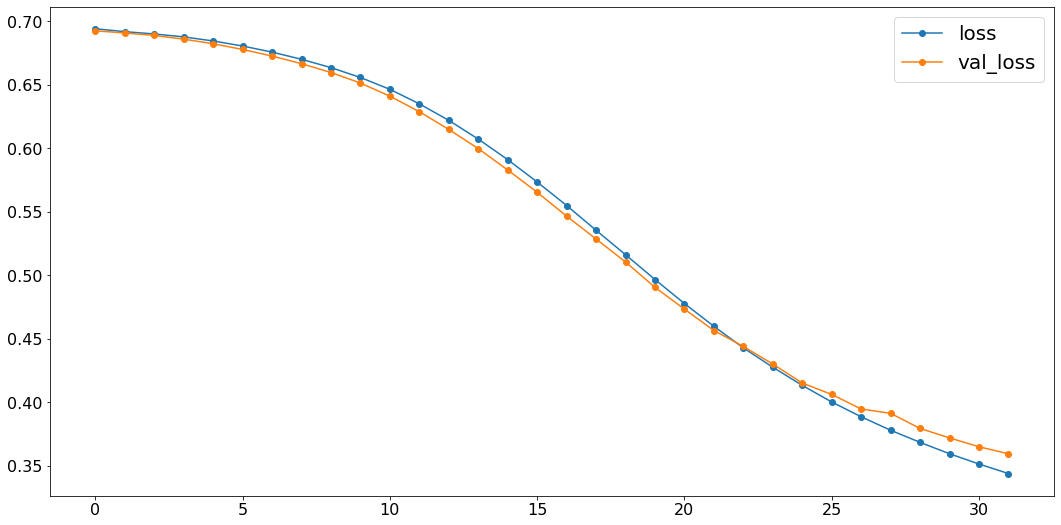

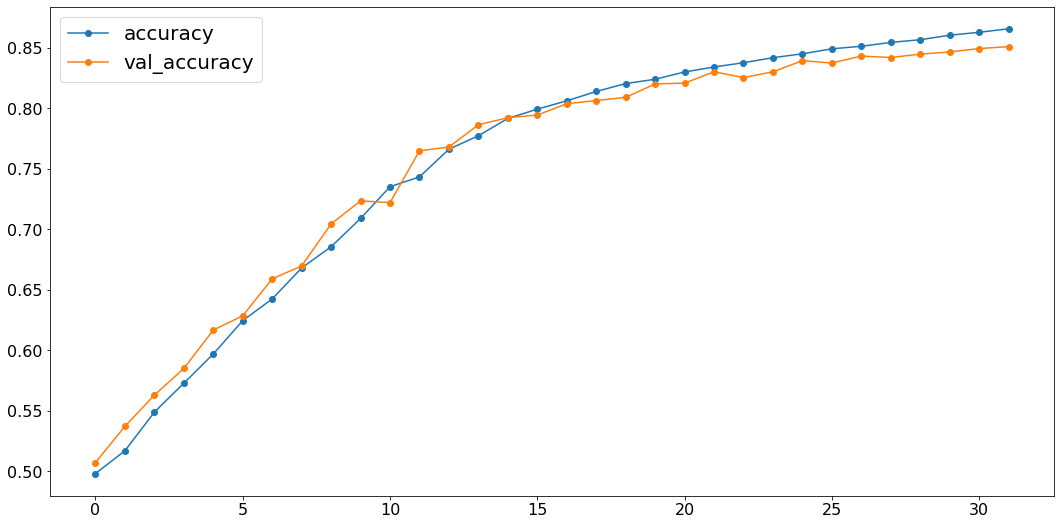

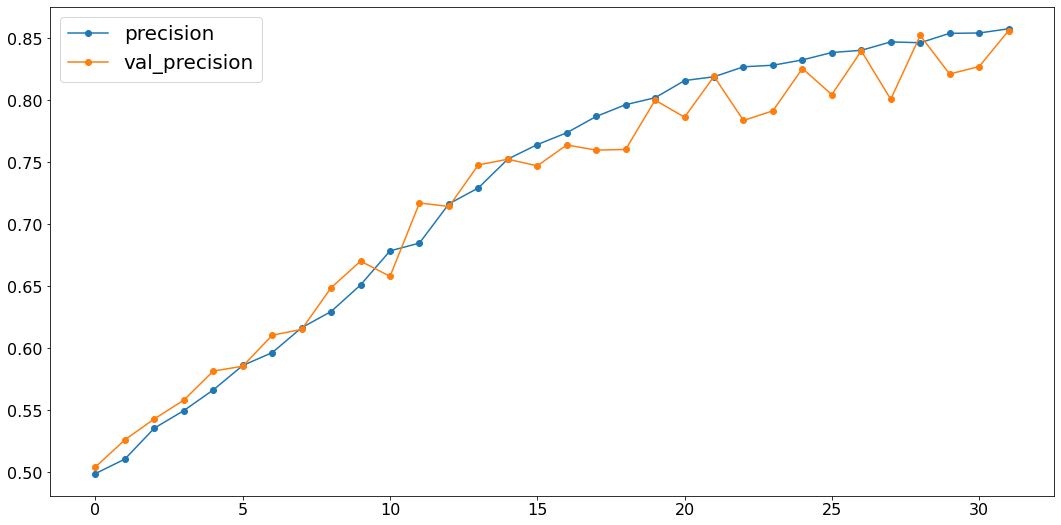

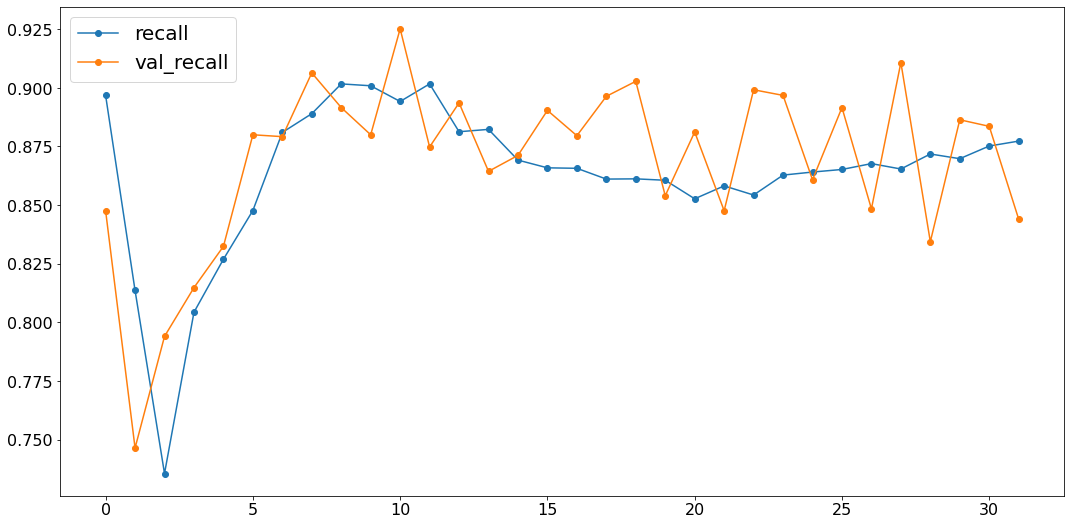

In [20]:
history_df = pd.DataFrame(history.history)

for metric in list(history.history.keys())[:4]:
    history_df[[metric, 'val_'+metric]].plot(style='-o', figsize=(18, 9), fontsize=16)

#### Предсказания сети

In [21]:
predictions = model.predict(x_tst)
predictions

array([[0.45604908],
       [0.969185  ],
       [0.5724987 ],
       ...,
       [0.15593132],
       [0.1950601 ],
       [0.315756  ]], dtype=float32)

(array([1830., 2513., 1675., 1295., 1110.,  973.,  944.,  890.,  857.,
         844.,  848.,  935.,  876., 1019., 1126., 1242., 1367., 1538.,
        1655., 1463.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

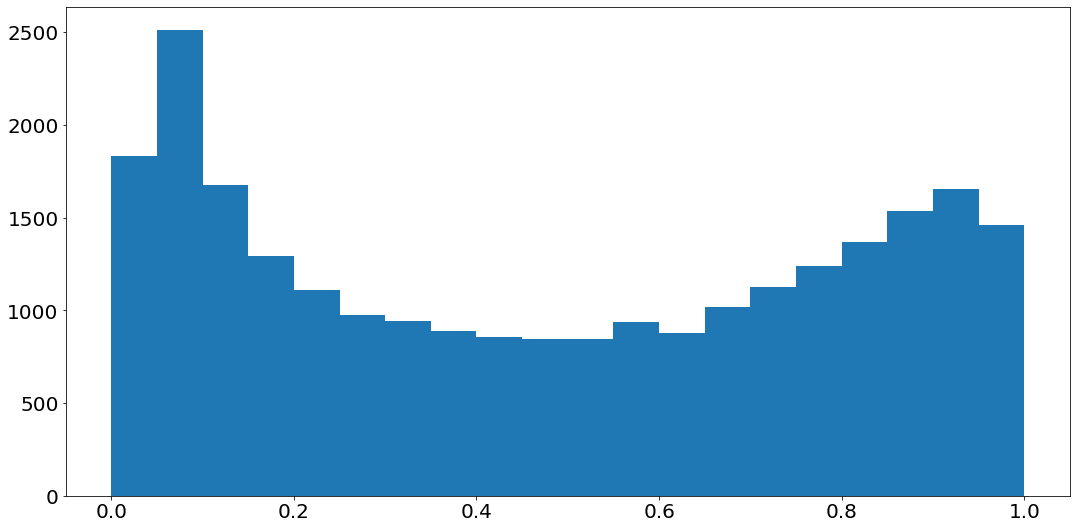

In [22]:
plt.hist(predictions, bins=np.arange(0.0, 1.01, 0.05))

In [23]:
model.evaluate(x_tst, y_tst)

782/782 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8493 - precision: 0.8618 - recall: 0.8321


[0.36534565687179565,
 0.8493199944496155,
 0.8617947101593018,
 0.8320800065994263]

### Предсказание цен на дом

[Keras Boston Dataset](https://keras.io/api/datasets/boston_housing/)

[Описание набора данных](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

#### Загрузка данных

In [24]:
(x_trn, y_trn), (x_tst, y_tst) = datasets.boston_housing.load_data()

y_trn = y_trn[:, None]
y_tst = y_tst[:, None]

print('x_trn.shape', x_trn.shape)
print('y_trn.shape', y_trn.shape)
print()
print('x_tst.shape', x_tst.shape)
print('y_tst.shape', y_tst.shape)

x_trn.shape (404, 13)
y_trn.shape (404, 1)

x_tst.shape (102, 13)
y_tst.shape (102, 1)


In [25]:
pd.DataFrame(x_trn)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


Проверим, что у нас нет пропущенных значений.

In [26]:
pd.DataFrame(x_trn).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

#### Подготовка данных

Выполним нормализацию данных

In [27]:
mean = x_trn.mean(axis=0)  # среднее значение по столбцам
std = x_trn.std(axis=0)  # стандартное отклонение по столбцам

x_trn = (x_trn - mean) / std
x_tst = (x_tst - mean) / std

print(x_trn.shape)
print(x_tst.shape)

(404, 13)
(102, 13)


#### Конструирование сети

In [28]:
def build_model(hidden_layers_units: int = 64):

    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=(13, )))
    model.add(layers.Dense(units=hidden_layers_units, activation='sigmoid'))
    model.add(layers.Dense(units=hidden_layers_units, activation='sigmoid'))
    model.add(layers.Dense(units=1))

    model.compile(
        optimizer='sgd',
        loss='mse',
        metrics=['mae', 'mse'],
    )
    
    return model


model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


#### Обучение сети и KFold валидация

KFold валидация используется, когда у нас мало данных и требуется оценить качество модели.

![](https://i.stack.imgur.com/mdgJJ.png)

In [29]:
from sklearn.model_selection import KFold

In [30]:
kf = KFold(n_splits=5, shuffle=False)

In [31]:
first_split = True
# для каждого фолда
for i, (trn_idx, vld_idx) in enumerate(kf.split(x_trn)):
    x_trn_fold = x_trn[trn_idx, :]
    y_trn_fold = y_trn[trn_idx]
    
    x_vld_fold = x_trn[vld_idx, :]
    y_vld_fold = y_trn[vld_idx]
    
    model = build_model(hidden_layers_units=64)
    
    history = model.fit(
        x=x_trn_fold,
        y=y_trn_fold,
        batch_size=8,
        epochs=100,
        verbose=0,
        validation_data=(x_vld_fold, y_vld_fold)
    )
    
    if first_split:
        agg_history = pd.DataFrame(history.history)
        first_split = False
    # сохраняем метрики качества
    agg_history = agg_history + pd.DataFrame(history.history)
    
agg_history /= 5

In [32]:
agg_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,105.413506,7.854068,105.413506,59.921641,5.794403,59.921641
1,48.447367,5.205109,48.447367,45.040638,4.820898,45.040638
2,33.781485,4.403959,33.781485,37.630820,4.792417,37.630820
3,32.119193,4.331828,32.119193,53.975252,5.680632,53.975252
4,26.813724,4.062309,26.813724,26.966203,3.936394,26.966203
...,...,...,...,...,...,...
95,6.511754,2.077543,6.511754,13.196781,2.631731,13.196781
96,6.385939,2.074013,6.385939,12.384745,2.541486,12.384745
97,6.293809,2.055941,6.293809,13.223949,2.767162,13.223949
98,6.644416,2.125228,6.644416,14.630873,2.941161,14.630873


<AxesSubplot:>

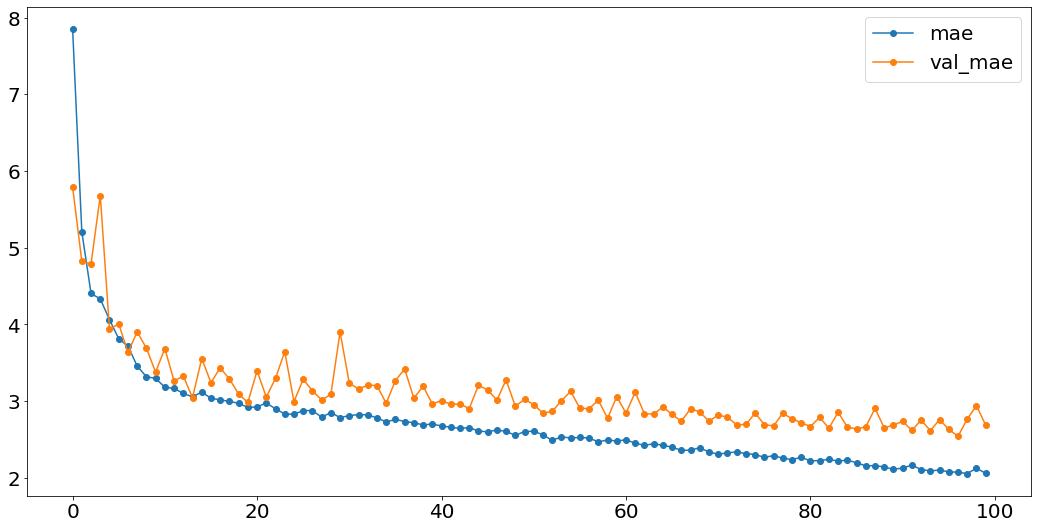

In [33]:
agg_history[['mae', 'val_mae']].plot(style='-o')

<AxesSubplot:>

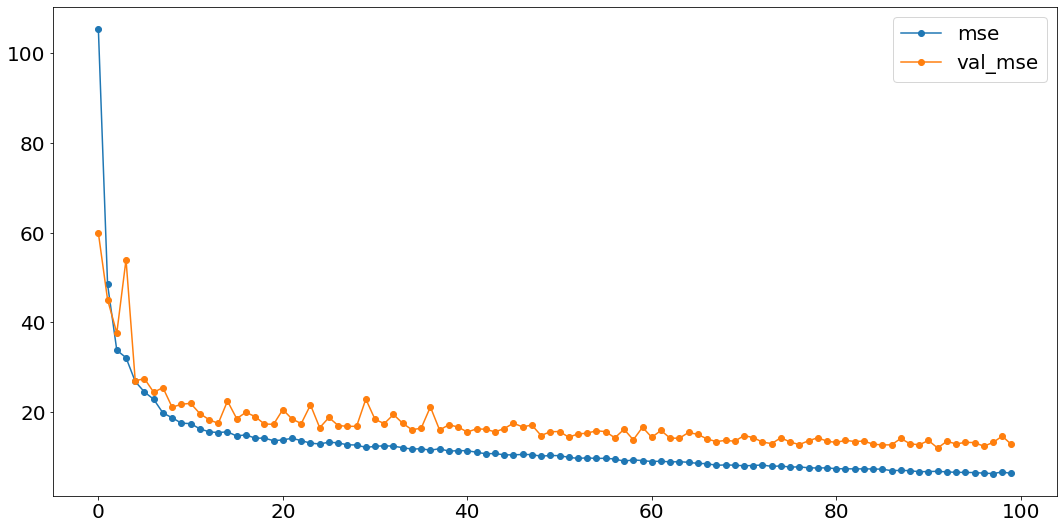

In [34]:
agg_history[['mse', 'val_mse']].plot(style='-o')

In [35]:
model.evaluate(x_tst, y_tst)

4/4 [==============================] - 0s 1ms/step - loss: 17.1395 - mae: 2.7819 - mse: 17.1395


[17.13947296142578, 2.7818663120269775, 17.13947296142578]

Взглянем на предсказания модели

In [36]:
predictions = model.predict(x_tst)
predictions

array([[10.075955],
       [19.85577 ],
       [21.439247],
       [32.576263],
       [23.400496],
       [21.09459 ],
       [30.92079 ],
       [22.581577],
       [19.7732  ],
       [20.854166],
       [19.753422],
       [17.65587 ],
       [17.286081],
       [38.294983],
       [18.790213],
       [21.16719 ],
       [25.46835 ],
       [22.245216],
       [19.16515 ],
       [30.122364],
       [12.700517],
       [15.948606],
       [21.284914],
       [17.196411],
       [20.864765],
       [22.253298],
       [30.458342],
       [25.820063],
       [11.817375],
       [21.25216 ],
       [21.378166],
       [14.688444],
       [33.37282 ],
       [24.01116 ],
       [18.442066],
       [ 9.668382],
       [16.694273],
       [20.503912],
       [18.425896],
       [26.072237],
       [27.165224],
       [26.254904],
       [14.477576],
       [39.704823],
       [25.942125],
       [24.259823],
       [27.403238],
       [19.515915],
       [21.565737],
       [22.905272],


Состыкуем предсказания и реальные данные

In [37]:
np.hstack([predictions,  y_tst]).round(2)

array([[10.08,  7.2 ],
       [19.86, 18.8 ],
       [21.44, 19.  ],
       [32.58, 27.  ],
       [23.4 , 22.2 ],
       [21.09, 24.5 ],
       [30.92, 31.2 ],
       [22.58, 22.9 ],
       [19.77, 20.5 ],
       [20.85, 23.2 ],
       [19.75, 18.6 ],
       [17.66, 14.5 ],
       [17.29, 17.8 ],
       [38.29, 50.  ],
       [18.79, 20.8 ],
       [21.17, 24.3 ],
       [25.47, 24.2 ],
       [22.25, 19.8 ],
       [19.17, 19.1 ],
       [30.12, 22.7 ],
       [12.7 , 12.  ],
       [15.95, 10.2 ],
       [21.28, 20.  ],
       [17.2 , 18.5 ],
       [20.86, 20.9 ],
       [22.25, 23.  ],
       [30.46, 27.5 ],
       [25.82, 30.1 ],
       [11.82,  9.5 ],
       [21.25, 22.  ],
       [21.38, 21.2 ],
       [14.69, 14.1 ],
       [33.37, 33.1 ],
       [24.01, 23.4 ],
       [18.44, 20.1 ],
       [ 9.67,  7.4 ],
       [16.69, 15.4 ],
       [20.5 , 23.8 ],
       [18.43, 20.1 ],
       [26.07, 24.5 ],
       [27.17, 33.  ],
       [26.25, 28.4 ],
       [14.48, 14.1 ],
       [39.

Воспользуемся средней процентной ошибкой, чтобы узнать качество модели в %.

$$ \Large MAPE = \frac{|y_{pred} - y_{true}|}{y_{true}} $$

In [38]:
(np.abs(predictions - y_tst) / y_tst).round(2).mean()

0.14411764705882352

В среднем мы ошибаемся на 14% как большую, так и в меньшую сторону.

### Классификация предметов одежды: Fashion MNIST

[Fashion Mnist Dataset](https://www.kaggle.com/zalando-research/fashionmnist)

#### Загрузка данных

In [39]:
(x_trn, y_trn), (x_tst, y_tst) = keras.datasets.fashion_mnist.load_data()

y_trn = y_trn[:, None]
y_tst = y_tst[:, None]

print('x_trn.shape', x_trn.shape)
print('y_trn.shape', y_trn.shape)
print()
print('x_tst.shape', x_tst.shape)
print('y_tst.shape', y_tst.shape)

x_trn.shape (60000, 28, 28)
y_trn.shape (60000, 1)

x_tst.shape (10000, 28, 28)
y_tst.shape (10000, 1)


In [40]:
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

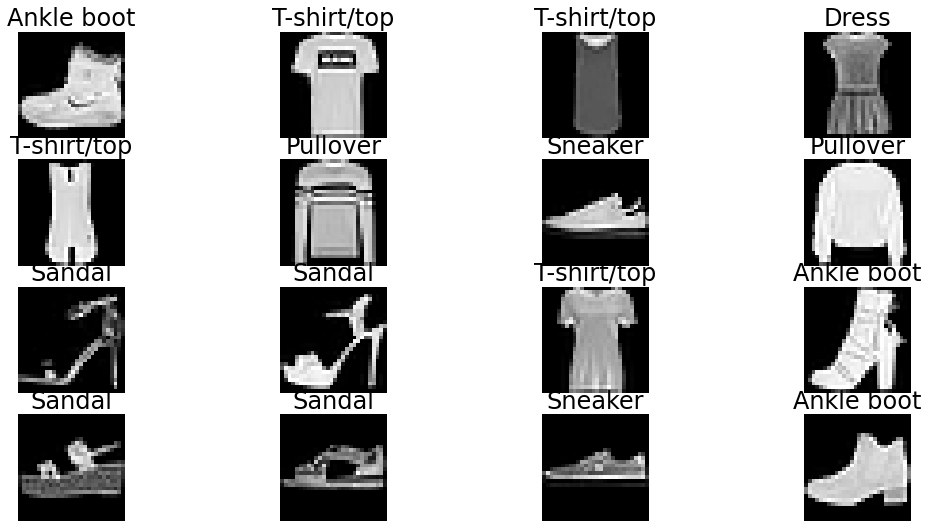

In [41]:
fig, axes = plt.subplots(4, 4)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_trn[i], cmap='gray')
    ax.set_title(class_names[y_trn[i, 0]])
    ax.axis('off')

In [42]:
pd.DataFrame(x_trn[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


#### Подготовка данных

In [43]:
x_trn = x_trn / 255.0
x_tst = x_tst / 255.0

print(x_trn.dtype)
print(x_tst.dtype)

float64
float64


![](https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [44]:
y_trn = y_trn.astype(np.float32)
y_tst = y_tst.astype(np.float32)

y_trn = keras.utils.to_categorical(y_trn)
y_tst = keras.utils.to_categorical(y_tst)

print(y_trn.dtype)
print(y_tst.dtype)

float32
float32


Добавим разбиение на проверочные данные

In [45]:
x_trn, x_vld, y_trn, y_vld = train_test_split(x_trn, y_trn, test_size=0.2, stratify=y_trn)

print(x_trn.shape, y_trn.shape)
print(x_vld.shape, y_vld.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


Проверим баланс классов:

In [46]:
from collections import Counter

In [47]:
pd.DataFrame(
    {
        'trn': Counter(sorted(y_trn.ravel())),
        'tst': Counter(sorted(y_tst.ravel())),
    }
)

,trn,tst
0.0,432000,90000
1.0,48000,10000


#### Конструирование сети

![](https://www.researchgate.net/profile/Charlotte_Pelletier/publication/331525817/figure/fig2/AS:733072932745216@1551789615161/Example-of-fully-connected-neural-network.png)

In [48]:
def build_model():

    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=(28, 28)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=300, activation='relu'))
    model.add(layers.Dense(units=300, activation='relu'))
    model.add(layers.Dense(units=100, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))

    model.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=[
            metrics.CategoricalAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
        ],
    )
    
    return model


model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(
    x=x_trn,
    y=y_trn,
    batch_size=32,
    epochs=16,
    validation_data=(x_vld, y_vld),
)

Epoch 1/16
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0706 - accuracy: 0.6665 - precision: 0.8397 - recall: 0.4186 - val_loss: 0.5242 - val_accuracy: 0.8207 - val_precision: 0.8739 - val_recall: 0.7565
Epoch 2/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5092 - accuracy: 0.8209 - precision: 0.8695 - recall: 0.7636 - val_loss: 0.4535 - val_accuracy: 0.8426 - val_precision: 0.8816 - val_recall: 0.7987
Epoch 3/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4432 - accuracy: 0.8417 - precision: 0.8805 - recall: 0.8005 - val_loss: 0.4202 - val_accuracy: 0.8530 - val_precision: 0.8887 - val_recall: 0.8156
Epoch 4/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4084 - accuracy: 0.8554 - precision: 0.8894 - recall: 0.8201 - val_loss: 0.4282 - val_accuracy: 0.8443 - val_precision: 0.8752 - val_recall: 0.8153
Epoch 5/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3903 - accuracy: 0

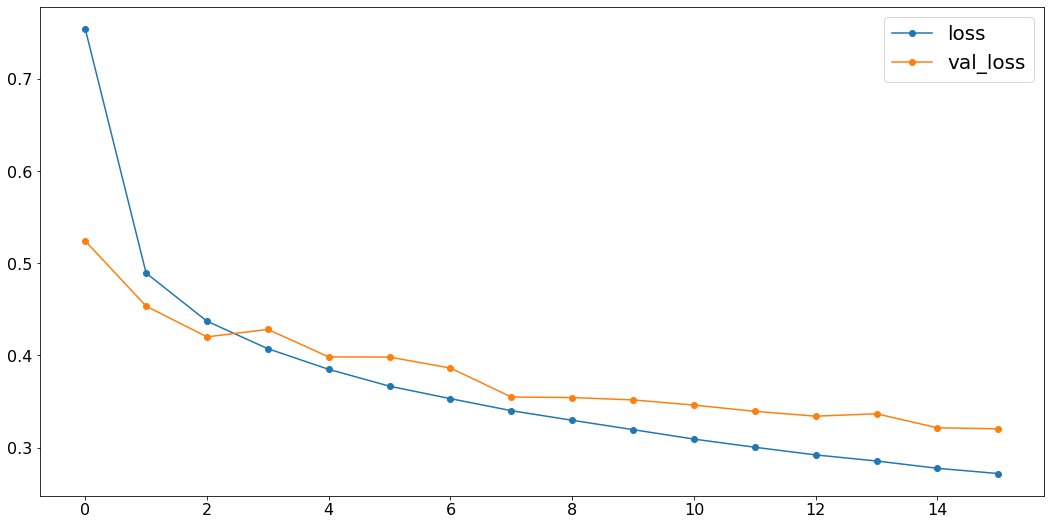

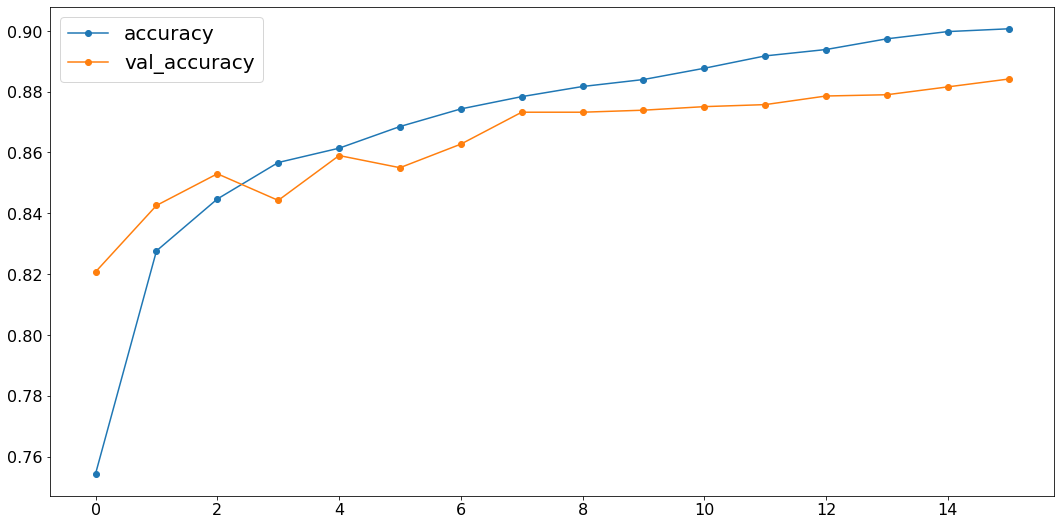

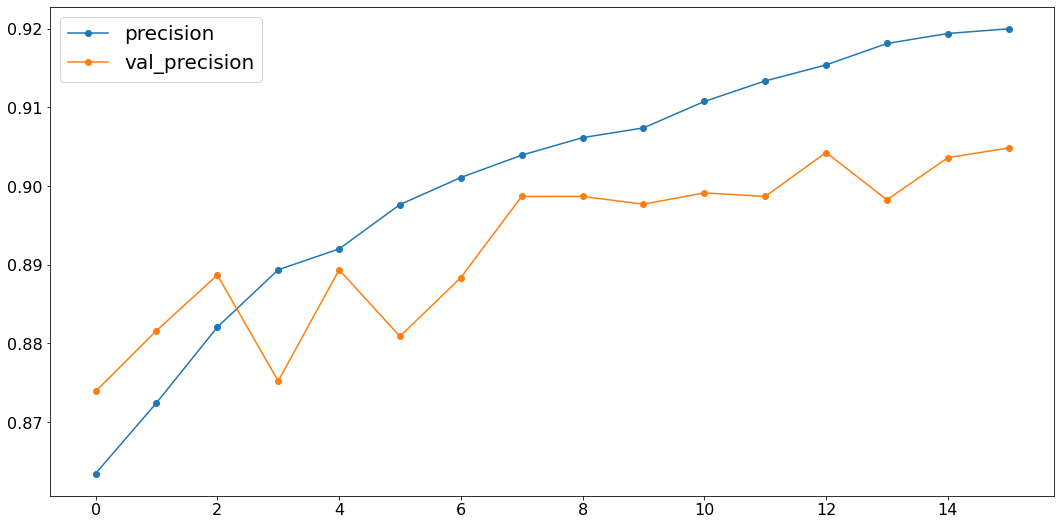

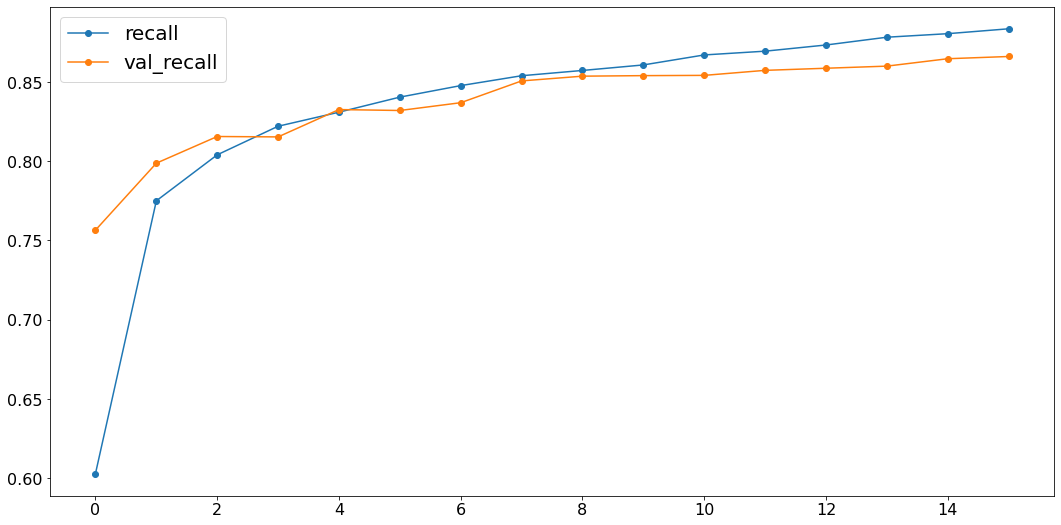

In [50]:
history_df = pd.DataFrame(history.history)

for metric in list(history.history.keys())[:4]:
    history_df[[metric, 'val_'+metric]].plot(style='-o', figsize=(18, 9), fontsize=16)

In [51]:
model.evaluate(x_tst, y_tst)

313/313 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8789 - precision: 0.9003 - recall: 0.8599


[0.343331903219223, 0.8788999915122986, 0.9003245830535889, 0.8598999977111816]

На тестовой выборке:
- доля правильных ответов (accuracy) - 87.89%
- точность (precision) - 90.03%
- полнота (recall) - 85.99%

Взглянем на предсказания:

In [52]:
predictions = model.predict(x_tst)
predictions[:5].round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.18, 0.  , 0.04, 0.01, 0.01, 0.  , 0.77, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
predictions = np.argmax(predictions, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5])

Посмотрим на отчёт классификации и матрицу ошибок

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(np.argmax(y_tst, axis=1), predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.84      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.82      0.75      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.75      0.63      0.69      1000
           7       0.94      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



По матрице ошибок можно увидеть какие предметы одежды путает между собой модель.

In [56]:
confusion_matrix(np.argmax(y_tst, axis=1), predictions)

array([[884,   0,  13,  22,   3,   1,  66,   0,  11,   0],
       [  4, 964,   0,  24,   3,   0,   4,   0,   1,   0],
       [ 17,   1, 840,  18,  67,   0,  54,   0,   3,   0],
       [ 31,  11,  12, 888,  31,   0,  22,   0,   5,   0],
       [  1,   1, 149,  36, 754,   0,  54,   0,   5,   0],
       [  0,   0,   0,   1,   0, 950,   0,  27,   2,  20],
       [167,   1,  99,  27,  63,   0, 630,   0,  13,   0],
       [  0,   0,   0,   0,   0,  21,   0, 953,   1,  25],
       [  3,   1,   6,   5,   4,   5,   5,   3, 968,   0],
       [  0,   0,   0,   0,   0,   5,   1,  36,   0, 958]])